## Problem Statement
Telecom companies often lose customers due to pricing, service quality, or competition. This project aims to understand why customers churn and predict which customers are at risk, so the company can improve customer retention and reduce revenue loss.

In [1]:
# Import Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Python libraries such as Pandas and NumPy were used for data manipulation, while Matplotlib and Seaborn were used for data visualization.

## Upload Dataset

In [3]:
df=pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Preliminary Data Inspection

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset contains customer-level information with both categorical and numerical variables. The target variable is “Churn”, which indicates whether a customer has discontinued the service.

## Data Cleaning

In [7]:
df['TotalCharges'] = df['TotalCharges'].str.strip().replace('',pd.NA)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


We drop rows which contains NA because the missing values correspond to new customers with zero tenure and no billing history, and imputing them would create incorrect revenue information.

In [8]:
df.dropna(inplace = True)

Data cleaning was performed to handle missing values and incorrect data types. The “TotalCharges” column was converted into numeric format, and records with missing values were removed.

## Encode Target Variable

In [9]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

The target variable “Churn” was encoded into numerical format to make it suitable for machine learning models.

## Exploratory Data Analysis (EDA)

### Churn Distribution

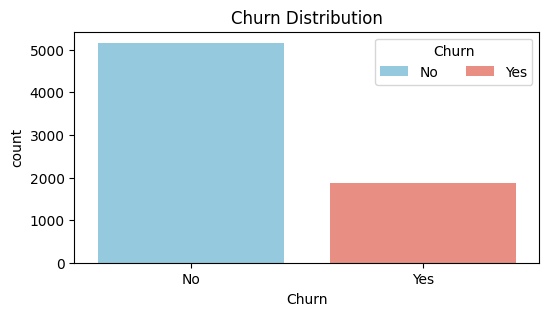

In [10]:
plt.figure(figsize = (6,3))
sns.countplot(x = 'Churn',data = df, hue = 'Churn',palette={0: 'skyblue', 1: 'salmon'}, legend = False)
plt.title('Churn Distribution')
plt.xticks([1,0],['Yes','No'])
plt.legend(title = 'Churn',labels = ['No','Yes'],loc = 'upper right',bbox_to_anchor = (1,1),ncol = 2)
plt.savefig('Churn Distribution')
plt.show()

The chart shows the distribution of churned and non-churned customers. A significant portion of customers have churned, highlighting the importance of churn prediction.

### Churn vs Contract Type

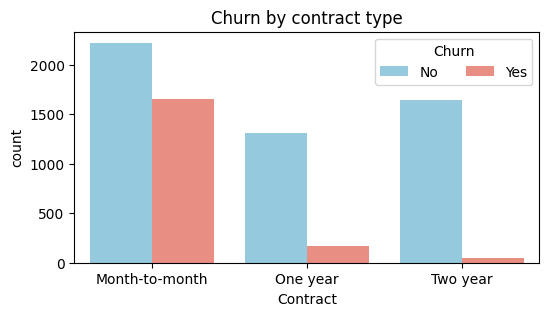

In [11]:
plt.figure(figsize = (6,3))
sns.countplot(x = 'Contract',data = df,hue = 'Churn',palette={0: 'skyblue', 1: 'salmon'}, legend = False)
plt.title('Churn by contract type')
plt.legend(title = 'Churn',labels = ['No','Yes'],loc = 'upper right',bbox_to_anchor = (1,1),ncol = 2)
plt.savefig('Churn vs Contract Type')
plt.show()

Customers with month-to-month contracts show a higher churn rate compared to customers with long-term contracts.

### Monthly Charges vs Churn

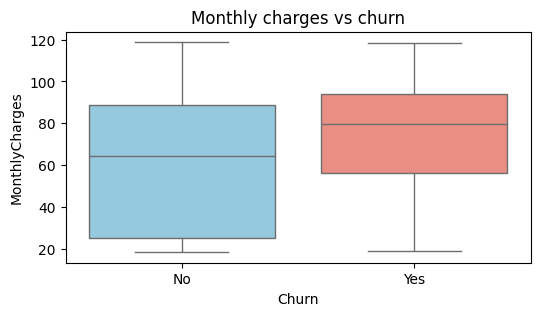

In [12]:
plt.figure(figsize = (6,3))
sns.boxplot(x = 'Churn',y = 'MonthlyCharges', data = df,hue = 'Churn',palette = {0: 'skyblue', 1: 'salmon'},legend = False)
plt.title('Monthly charges vs churn')
plt.xticks([0,1],['No','Yes'])
plt.savefig('Monthly Charges vs Churn')
plt.show()

Customers who churn tend to have higher monthly charges, indicating pricing as an important factor in churn behavior.

### Tenure vs Churn

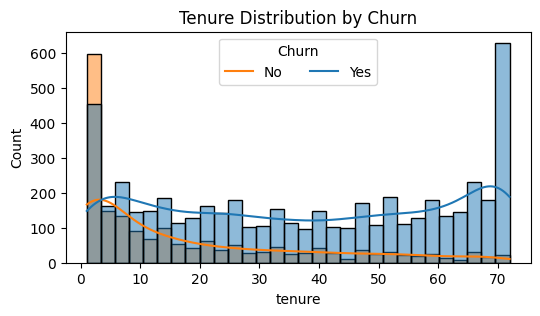

In [13]:
plt.figure(figsize = (6,3))
sns.histplot(data = df, x = 'tenure',hue = 'Churn',bins = 30,kde = True)
plt.title('Tenure Distribution by Churn')
plt.legend(title = 'Churn',labels = ['No','Yes'],loc = 'upper center',bbox_to_anchor = (0.5,1),ncol = 2)
plt.savefig('Tenure vs Churn')
plt.show()

The tenure distribution shows that customer churn is concentrated in the early months of service. While a few long-tenure customers also churn, the overall trend indicates that customers with longer tenure are more likely to stay with the company.

### Churn vs Payment Method

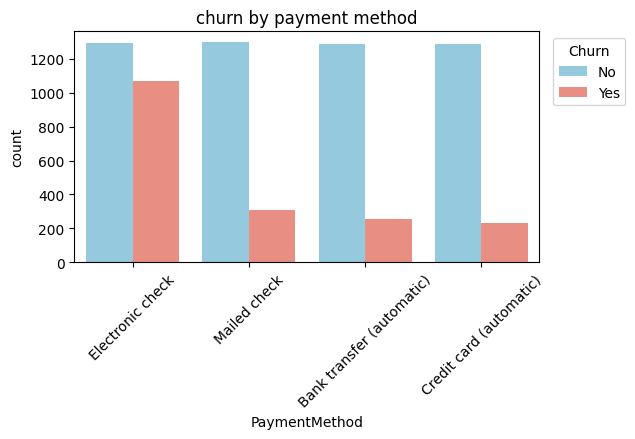

In [14]:
plt.figure(figsize = (6,3))
sns.countplot(data = df, x = 'PaymentMethod',hue = 'Churn',palette = {0:'skyblue',1:'salmon'},legend = False)
plt.title('churn by payment method')
plt.xticks(rotation = 45)
plt.legend(title = 'Churn',labels = ['No','Yes'],loc = 'upper right',bbox_to_anchor = (1.2,1),ncol = 1)
plt.savefig('Churn vs Payment Method')
plt.show()

The chart shows that customers using electronic check payment methods have a higher churn rate compared to other payment methods, indicating possible dissatisfaction or billing issues.

### Churn vs Internet Service Type

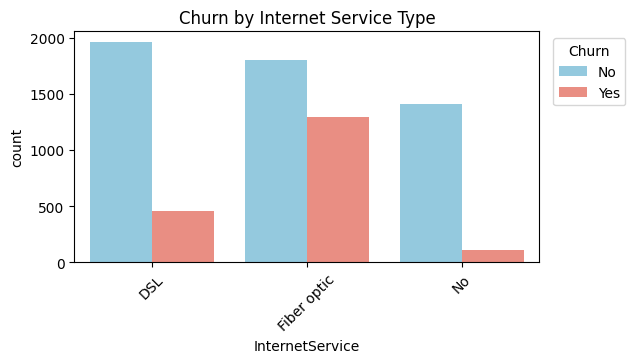

In [15]:
plt.figure(figsize = (6,3))
sns.countplot(data = df, x = 'InternetService',hue = 'Churn',palette = {0:'skyblue',1:'salmon'},legend = False)
plt.title('Churn by Internet Service Type')
plt.xticks(rotation = 45)
plt.legend(title = 'Churn',labels = ['No','Yes'],loc = 'upper right',bbox_to_anchor = (1.2,1),ncol = 1)
plt.savefig('Churn vs Internet Service Type')
plt.show()

Customers using fiber optic internet services show relatively higher churn, which may be linked to higher service costs or service quality expectations.

### Senior Citizen vs Churn

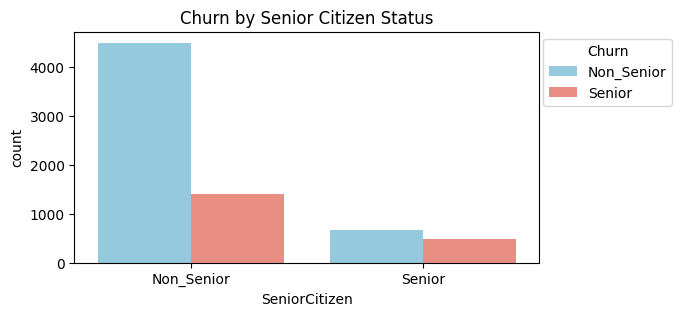

In [16]:
plt.figure(figsize = (6,3))
sns.countplot(data = df, x = 'SeniorCitizen',hue = 'Churn',palette = {0:'skyblue',1:'salmon'},legend = False)
plt.title('Churn by Senior Citizen Status')
plt.xticks([0,1],['Non_Senior','Senior'])
plt.legend(title = 'Churn',labels = ['Non_Senior','Senior'],loc = 'upper right',bbox_to_anchor = (1.3,1),ncol = 1)
plt.savefig('Senior Citizen vs Churn')
plt.show()

The analysis indicates that senior citizens exhibit a different churn pattern compared to non-senior customers, suggesting the need for customized retention strategies.

### Monthly Charges Distribution by Churn

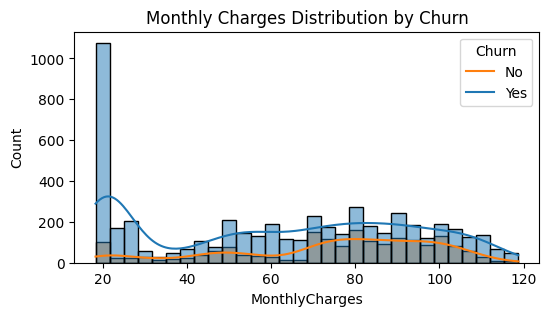

In [17]:
plt.figure(figsize = (6,3))
sns.histplot(data = df, x = 'MonthlyCharges',hue = 'Churn',bins = 30,kde =True)
plt.title('Monthly Charges Distribution by Churn')
plt.legend(title= 'Churn',labels =['No','Yes'])
plt.savefig('Monthly Charges Distribution by Churn')
plt.show()

Customers who churn tend to have higher monthly charges, indicating that pricing plays a significant role in customer retention.

### Tenure vs Monthly Charges

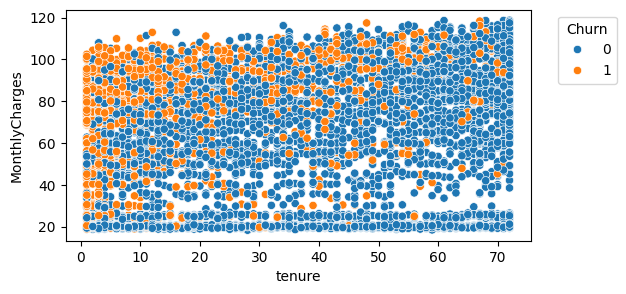

In [18]:
plt.figure(figsize = (6,3))
sns.scatterplot(data = df, y='MonthlyCharges',x='tenure',hue = 'Churn')
plt.legend(title='Churn',loc = 'upper right',bbox_to_anchor = (1.2,1),ncol = 1)
plt.savefig('Tenure vs Monthly Charges')
plt.show()

Customers with shorter tenure and higher monthly charges show a higher tendency to churn, highlighting early-stage dissatisfaction.

### Correlation Heatmap

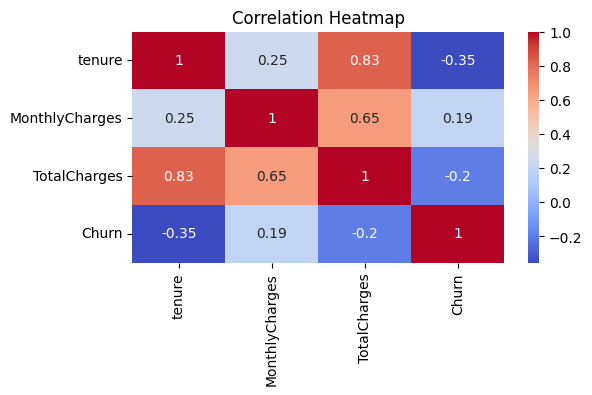

In [19]:
plt.figure(figsize =(6,3))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges','Churn']].corr(),annot = True,cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap')
plt.show()

The heatmap highlights the relationships between numerical variables and churn, helping identify features that influence churn behavior.

## Feature Encoding

In [20]:
df_encoded = pd.get_dummies(df, drop_first=True)

Categorical variables were converted into numerical format using one-hot encoding to make them suitable for model training.

## Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('Churn',axis = 1)
y = df_encoded['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

The dataset was divided into training and testing sets to evaluate the model’s performance on unseen data.

## Model Building (Logistic Regression)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Logistic regression was selected due to its simplicity and interpretability for binary classification problems such as churn prediction.

## Model Evaluation

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7825159914712153
[[916 117]
 [189 185]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



The model achieved 78% accuracy and performs well in identifying non-churn customers. However, its ability to detect churn customers is limited, with only 49% recall, meaning many churners are missed. To make the model more useful for business, improvements should focus on better churn detection, not just overall accuracy.

## Model Improving ( Random Forest)

In [24]:
# Import model from library
from sklearn.ensemble import RandomForestClassifier

rd_model = RandomForestClassifier(
    n_estimators = 100,
    criterion = 'gini',
    max_depth = 5,
    random_state  = 42,
    n_jobs = -1
)
rd_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [25]:
# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

y_predict = rd_model.predict(X_test)

print('Accuracy:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7825159914712153
[[916 117]
 [189 185]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



The model performs well in identifying non-churn customers, while recall for churn customers indicates scope for improving churn detection.

The Random Forest model improved the overall prediction by capturing non-linear patterns, but churn recall remains moderate due to class imbalance, which is a common challenge in churn problems.

  ## Interpretation of Results

The dataset shows class imbalance, which is common in churn problems and affects recall for churned customers.

The analysis shows that contract type, tenure, and monthly charges are key factors influencing customer churn. Customers with short tenure and higher charges are more likely to churn.

## Business Recommendations (From Analysis)

- Encourage long-term contracts

- Offer discounts to high-risk customers

- Improve onboarding for new customers

- Review pricing strategies